<a href="https://colab.research.google.com/github/isaac7y8y9y/PyTorch_NeuralNetwork_WritingTraining/blob/main/neuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 100428304.58it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7362529.25it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23065580.51it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10507737.88it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Epoch 1
-------------------------------
loss: 2.304394  [    0/60000]
Test Error: 
 Accuracy: 43.3%, Avg loss: 2.252662 

Epoch 2
-------------------------------
loss: 2.254162  [    0/60000]
Test Error: 
 Accuracy: 55.3%, Avg loss: 2.180907 

Epoch 3
-------------------------------
loss: 2.179921  [    0/60000]
Test Error: 
 Accuracy: 63.0%, Avg loss: 2.059398 

Epoch 4
-------------------------------
loss: 2.061046  [    0/60000]
Test Error: 
 Accuracy: 68.9%, Avg loss: 1.852602 

Epoch 5
-------------------------------
loss: 1.893765  [    0/60000]
Test Error: 
 Accuracy: 73.0%, Avg loss: 1.553103 

Epoch 6
-------------------------------
loss: 1.489589  [    0/60000]
Test Error: 
 Accuracy: 76.5%, Avg loss: 1.241360 

Epoch 7
-------------------------------
loss: 1.307330  [    0/60000]
Test Error: 
 Accuracy: 79.0%, Avg loss: 1.005875 

Epoch 8
-------------------------------
loss: 1.018492  [    0/60000]
Test Error: 
 Accuracy: 81.1%, Avg loss: 0.844044 

Epoch 9
----------------

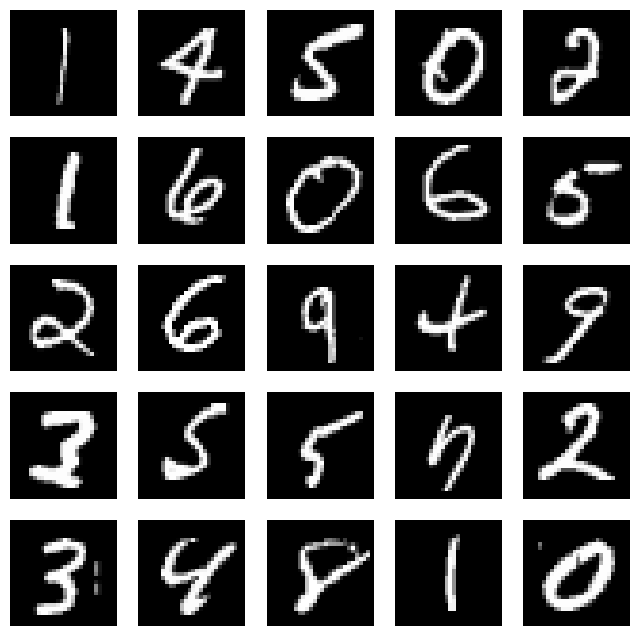

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


"""

This script train neural network to write numerial value.

As an example, we'll download the MNIST dataset. The MNIST is a dataset of images of handwritten digits,
 containing 60 thousand samples and a test set of 10 thousand images.

"""


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        #nn.Flaten transform data from multidimensional to one dimensional
        self.flatten = nn.Flatten()

        #nn.Sequential creates a layers inside the network
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    #this forward func called when the model is executed, but should not be called directly
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


#feed MNSIT data to the neural network model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


#test how accurate nerual network learn writing number
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

# train and load writing data
loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

model = NeuralNetwork()

#loss function measures how far our model is from the correct results, and it's
#what we'll try to minimize during the training of the network
loss_function = nn.CrossEntropyLoss()

#optimizer is an algorithm in charge of adjusting the model during the training
#process to minimize the error measured by the loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)



epochs = 9
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(loaded_train, model, loss_function, optimizer)
    test(loaded_test, model, loss_function)
print("Done!")

#below used to plot the graph

figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()